In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
categorical_features=train.select_dtypes(include=["object"]).columns
numerical_features=train.select_dtypes(exclude=["object"]).columns
numerical_features=numerical_features.drop("SalePrice")
print("cat features:",len(categorical_features))
print(categorical_features)
print("num features:",len(numerical_features))
print(numerical_features)

cat features: 43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
num features: 37
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
 

In [5]:
#percentage of entries that are empty
for i in range(81):
    tnull=train[train.columns[i]].isnull().sum()
    if tnull>0:
        print(train.columns[i],":",(tnull/1460))

LotFrontage : 0.1773972602739726
Alley : 0.9376712328767123
MasVnrType : 0.005479452054794521
MasVnrArea : 0.005479452054794521
BsmtQual : 0.025342465753424658
BsmtCond : 0.025342465753424658
BsmtExposure : 0.026027397260273973
BsmtFinType1 : 0.025342465753424658
BsmtFinType2 : 0.026027397260273973
Electrical : 0.0006849315068493151
FireplaceQu : 0.4726027397260274
GarageType : 0.05547945205479452
GarageYrBlt : 0.05547945205479452
GarageFinish : 0.05547945205479452
GarageQual : 0.05547945205479452
GarageCond : 0.05547945205479452
PoolQC : 0.9952054794520548
Fence : 0.8075342465753425
MiscFeature : 0.963013698630137


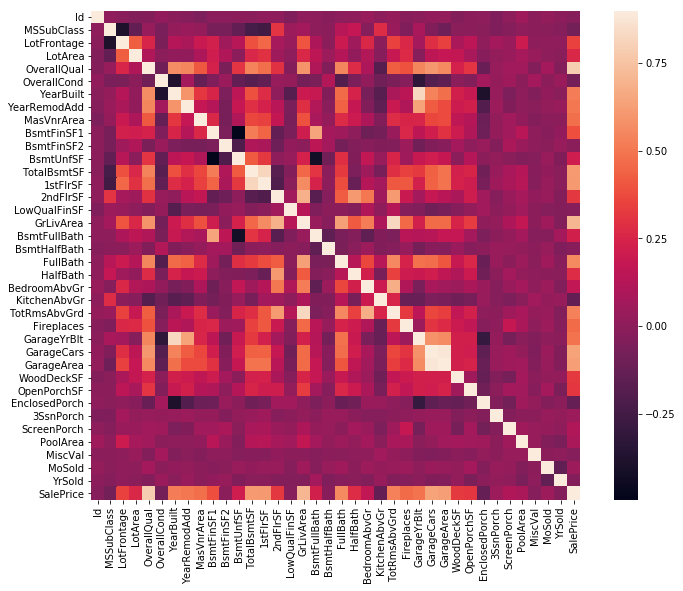

In [6]:
#correlation matrix code found online
corrmat=train.corr()
f, ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.9,square=True)

Alley, PoolQC, Fence, MiscFeature, MiscValue, OverallCond, KitchenAbvGr, LowQualFinSF

Things I can combine: ExterQual & ExterCond as ExterScore; BsmtQual & BsmtCond as BsmtScore; GarageQual & GarageCond as GarageScore; GrLivArea & TotalBsmtSF as total house area; MoSold & YrSold as datesold; OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch as PorchSF; BsmtFullBath & BsmtHalfBath as BsmtBath; FullBath & HalfBath as Bath;
Things I can drop: LandSlope or LandContour; GarageCars or Garage Areas; BsmtFinSF1 and BsmtFinSF2;OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch replaced with the porch type or not, 

In [7]:
#combine everything that I want to combine into one thing overall
train['TotalHouseSF']=train['GrLivArea']+train['TotalBsmtSF']
train['PorchSF']=train['OpenPorchSF']+train['EnclosedPorch']+train['3SsnPorch']+train['ScreenPorch']
train['BsmtBath']=train['BsmtFullBath']+.5*train['BsmtHalfBath']
train['Bath']=train['FullBath']+.5*train['HalfBath']
train['DateSold']=train['YrSold']+(1/12)*train['MoSold']

In [8]:
train.drop(columns=['Alley','PoolQC','Fence','MiscFeature','BsmtFinSF1','BsmtFinSF2','PoolArea','BsmtFullBath',
                    'BsmtHalfBath','FullBath','HalfBath','MiscVal','OpenPorchSF','EnclosedPorch','3SsnPorch',
                    'ScreenPorch','LowQualFinSF','YrSold','MoSold','1stFlrSF','2ndFlrSF','GarageArea','FireplaceQu'
                   ], axis=1, inplace=True)

In [9]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PavedDrive,WoodDeckSF,SaleType,SaleCondition,SalePrice,TotalHouseSF,PorchSF,BsmtBath,Bath,DateSold
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,Y,0,WD,Normal,208500,2566,61,1.0,2.5,2008.166667
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,Y,298,WD,Normal,181500,2524,0,0.5,2.0,2007.416667
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,Y,0,WD,Normal,223500,2706,42,1.0,2.5,2008.750000
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,Y,0,WD,Abnorml,140000,2473,307,1.0,1.0,2006.166667
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,Y,192,WD,Normal,250000,3343,84,1.0,2.5,2009.000000


In [10]:
#how many match the first values
for a in range(63):
    b=np.array(train[train.columns[a]])
    c=0
    for d in range(1460):
        if b[d]==b[0]:
            c=c+1
    if c>1200:
        print(train.columns[a],c,"percentage:",(c/1460))

Street 1454 percentage: 0.9958904109589041
LandContour 1311 percentage: 0.897945205479452
Utilities 1459 percentage: 0.9993150684931507
LandSlope 1382 percentage: 0.9465753424657535
Condition1 1260 percentage: 0.863013698630137
Condition2 1445 percentage: 0.9897260273972602
BldgType 1220 percentage: 0.8356164383561644
RoofMatl 1434 percentage: 0.9821917808219178
ExterCond 1282 percentage: 0.8780821917808219
BsmtCond 1311 percentage: 0.897945205479452
BsmtFinType2 1256 percentage: 0.8602739726027397
Heating 1428 percentage: 0.9780821917808219
CentralAir 1365 percentage: 0.934931506849315
Electrical 1334 percentage: 0.9136986301369863
KitchenAbvGr 1392 percentage: 0.9534246575342465
Functional 1360 percentage: 0.9315068493150684
GarageQual 1311 percentage: 0.897945205479452
GarageCond 1326 percentage: 0.9082191780821918
PavedDrive 1340 percentage: 0.9178082191780822
SaleType 1267 percentage: 0.8678082191780822


In [11]:
train.drop(['Street','Utilities','Condition2','RoofMatl','Heating','KitchenAbvGr','PavedDrive','LandSlope',
            'CentralAir','Electrical','Functional','BsmtCond','GarageQual','GarageCond'],axis=1,inplace=True)

In [12]:
for i in range(49):
    tnull=train[train.columns[i]].isnull().sum()
    if tnull>0:
        print(train.columns[i],":",(tnull/1460))

LotFrontage : 0.1773972602739726
MasVnrType : 0.005479452054794521
MasVnrArea : 0.005479452054794521
BsmtQual : 0.025342465753424658
BsmtExposure : 0.026027397260273973
BsmtFinType1 : 0.025342465753424658
BsmtFinType2 : 0.026027397260273973
GarageType : 0.05547945205479452
GarageYrBlt : 0.05547945205479452
GarageFinish : 0.05547945205479452


In [13]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'GrLivArea', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'WoodDeckSF', 'SaleType', 'SaleCondition', 'SalePrice', 'TotalHouseSF',
       'PorchSF', 'BsmtBath', 'Bath', 'DateSold'],
      dtype='object')

In [14]:
train.loc[:,"LotFrontage"]=train.loc[:,"LotFrontage"].fillna(0)
train.loc[:,"BsmtQual"]=train.loc[:,"BsmtQual"].fillna("No")
train.loc[:,"GarageFinish"]=train.loc[:,"GarageFinish"].fillna("No")
train.loc[:,"GarageYrBlt"]=train.loc[:,"GarageYrBlt"].fillna(0)

In [15]:
train.drop(['LotFrontage','OverallCond','YearRemodAdd','Exterior2nd','MasVnrType','MasVnrArea',
            'ExterCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','BedroomAbvGr',
            'Fireplaces','GarageYrBlt','WoodDeckSF','MSSubClass','GarageType','Exterior1st', 
            'Condition1','Foundation','RoofStyle','MSZoning','LandContour','LotConfig'],axis=1,inplace=True)
#Exterior1st, Condition1, Foundation, RoofStyle, MSZoning,LandContour,LotConfig dropped for lacking immediate usefulness

In [16]:
train.head()

,Id,LotArea,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,ExterQual,BsmtQual,...,GarageFinish,GarageCars,SaleType,SaleCondition,SalePrice,TotalHouseSF,PorchSF,BsmtBath,Bath,DateSold
0,1,8450,Reg,CollgCr,1Fam,2Story,7,2003,Gd,Gd,...,RFn,2,WD,Normal,208500,2566,61,1.0,2.5,2008.166667
1,2,9600,Reg,Veenker,1Fam,1Story,6,1976,TA,Gd,...,RFn,2,WD,Normal,181500,2524,0,0.5,2.0,2007.416667
2,3,11250,IR1,CollgCr,1Fam,2Story,7,2001,Gd,Gd,...,RFn,2,WD,Normal,223500,2706,42,1.0,2.5,2008.750000
3,4,9550,IR1,Crawfor,1Fam,2Story,7,1915,TA,TA,...,Unf,3,WD,Abnorml,140000,2473,307,1.0,1.0,2006.166667
4,5,14260,IR1,NoRidge,1Fam,2Story,8,2000,Gd,Gd,...,RFn,3,WD,Normal,250000,3343,84,1.0,2.5,2009.000000


In [18]:
#combine everything that I want to combine into one thing overall
test['TotalHouseSF']=test['GrLivArea']+test['TotalBsmtSF']
test['PorchSF']=test['OpenPorchSF']+test['EnclosedPorch']+test['3SsnPorch']+test['ScreenPorch']
test['BsmtBath']=test['BsmtFullBath']+.5*test['BsmtHalfBath']
test['Bath']=test['FullBath']+.5*test['HalfBath']
test['DateSold']=test['YrSold']+(1/12)*test['MoSold']
test.drop(columns=['Alley','PoolQC','Fence','MiscFeature','BsmtFinSF1','BsmtFinSF2','PoolArea','BsmtFullBath',
                   'BsmtHalfBath','FullBath','HalfBath','MiscVal','OpenPorchSF','EnclosedPorch','3SsnPorch',
                   'ScreenPorch','LowQualFinSF','YrSold','MoSold','1stFlrSF','2ndFlrSF','GarageArea','FireplaceQu',
                   'LotFrontage','OverallCond','YearRemodAdd','Exterior2nd','MasVnrType','MasVnrArea',
                   'ExterCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','BedroomAbvGr','Street',
                   'Utilities','Condition2','RoofMatl','Heating','KitchenAbvGr','PavedDrive','LandSlope',
                   'CentralAir','Electrical','Functional','BsmtCond','GarageQual','GarageCond',
                   'Fireplaces','GarageYrBlt','WoodDeckSF','MSSubClass','GarageType','Exterior1st', 
                   'Condition1','Foundation','RoofStyle','MSZoning','LandContour','LotConfig'], axis=1, inplace=True)
test.loc[:,"BsmtQual"]=test.loc[:,"BsmtQual"].fillna("No")
test.loc[:,"GarageFinish"]=test.loc[:,"GarageFinish"].fillna("No")

In [24]:
test.head()

,Id,LotArea,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,ExterQual,BsmtQual,...,TotRmsAbvGrd,GarageFinish,GarageCars,SaleType,SaleCondition,TotalHouseSF,PorchSF,BsmtBath,Bath,DateSold
0,1461,11622,Reg,NAmes,1Fam,1Story,5,1961,TA,TA,...,5,Unf,1.0,WD,Normal,1778.0,120,0.0,1.0,2010.500000
1,1462,14267,IR1,NAmes,1Fam,1Story,6,1958,TA,TA,...,6,Unf,1.0,WD,Normal,2658.0,36,0.0,1.5,2010.500000
2,1463,13830,IR1,Gilbert,1Fam,2Story,5,1997,TA,Gd,...,6,Fin,2.0,WD,Normal,2557.0,34,0.0,2.5,2010.250000
3,1464,9978,IR1,Gilbert,1Fam,2Story,6,1998,TA,TA,...,7,Fin,2.0,WD,Normal,2530.0,36,0.0,2.5,2010.500000
4,1465,5005,IR1,StoneBr,TwnhsE,1Story,8,1992,Gd,Gd,...,5,RFn,2.0,WD,Normal,2560.0,226,0.0,2.0,2010.083333


In [23]:
train.head()

,Id,LotArea,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,ExterQual,BsmtQual,...,GarageFinish,GarageCars,SaleType,SaleCondition,SalePrice,TotalHouseSF,PorchSF,BsmtBath,Bath,DateSold
0,1,8450,Reg,CollgCr,1Fam,2Story,7,2003,Gd,Gd,...,RFn,2,WD,Normal,208500,2566,61,1.0,2.5,2008.166667
1,2,9600,Reg,Veenker,1Fam,1Story,6,1976,TA,Gd,...,RFn,2,WD,Normal,181500,2524,0,0.5,2.0,2007.416667
2,3,11250,IR1,CollgCr,1Fam,2Story,7,2001,Gd,Gd,...,RFn,2,WD,Normal,223500,2706,42,1.0,2.5,2008.750000
3,4,9550,IR1,Crawfor,1Fam,2Story,7,1915,TA,TA,...,Unf,3,WD,Abnorml,140000,2473,307,1.0,1.0,2006.166667
4,5,14260,IR1,NoRidge,1Fam,2Story,8,2000,Gd,Gd,...,RFn,3,WD,Normal,250000,3343,84,1.0,2.5,2009.000000


In [25]:
train=train.replace({"HouseStyle" : {"1Story" : 1, "1.5Fin" : 1.5, "1.5Unf" : 1.25, "2Story" : 2,
                                     "2.5Fin" : 2.5, "2.5Unf" : 2.25, "SFoyer" : 2.1, "SLvl" : 2.1},
                     "GarageFinish" : {"No" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                     "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                     "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                     "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                     "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4}})
test=test.replace({"HouseStyle" : {"1Story" : 1, "1.5Fin" : 1.5, "1.5Unf" : 1.25, "2Story" : 2,
                                     "2.5Fin" : 2.5, "2.5Unf" : 2.25, "SFoyer" : 2.1, "SLvl" : 2.1},
                   "GarageFinish" : {"No" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                   "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                   "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                   "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                   "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4}})
#'Neighborhood','BldgType','SaleType','SaleCondition'